In [17]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [1]:
import cv2
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import sys

img_o = cv2.imread("mona_lisa.jpg")
img = cv2.cvtColor(img_o, cv2.COLOR_RGB2LAB)

In [2]:
T = lambda x : fft(fft(x, axis=0),axis=1)
IT = lambda x : np.maximum(np.minimum(np.real(ifft(ifft(x, axis=1),axis=0)).astype(np.uint8), 255), 0)

In [3]:
DEGREE = 50

In [4]:
freq_img = T(img)
new_img = np.zeros(freq_img.shape, dtype=freq_img.dtype)
new_img[:DEGREE][:DEGREE] = freq_img[:DEGREE][:DEGREE]

In [5]:
img_f = IT(new_img)
img_fd = cv2.cvtColor(img_f, cv2.COLOR_LAB2RGB)

In [6]:
downsampled = cv2.resize(cv2.resize(img_o, (DEGREE-1, DEGREE-1), interpolation = cv2.INTER_AREA), (img.shape[1],img.shape[0]), interpolation = cv2.INTER_AREA)

In [9]:
display_img = np.concatenate((img_fd, downsampled), axis=1)
display_img = cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB)

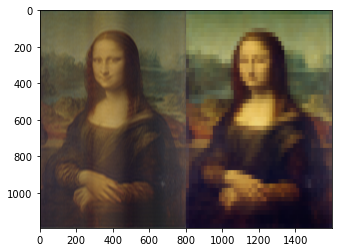

In [16]:
plt.imshow(display_img,cmap='gray')
plt.show()

In [32]:
cv2.imshow('image', display_img)
cv2.waitKey(0)

-1

In [26]:
def f(x):
    freq_img = T(img)
    new_img = np.zeros(freq_img.shape, dtype=freq_img.dtype)
    new_img[:x][:x] = freq_img[:x][:x]
    img_f = IT(new_img)
    img_fd = cv2.cvtColor(img_f, cv2.COLOR_LAB2RGB)
    downsampled = cv2.resize(cv2.resize(img_o, (x-1, x-1), interpolation = cv2.INTER_AREA), (img.shape[1],img.shape[0]), interpolation = cv2.INTER_AREA)
    display_img = np.concatenate((img_fd, downsampled), axis=1)
    display_img = cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB)
    plt.imshow(display_img,cmap='gray')
    plt.show()
    return x

In [27]:
interact(f, x=widgets.IntSlider(min=1, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=1), Output()), _dom_classes=('widget-in…